In [4]:
# modules we'll use
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import LabelEncoder

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# read in all our data
HPP_data = pd.read_csv("../train.csv")

# set seed for reproducibility
np.random.seed(0)

In [68]:
#show first five rows of data
HPP_data.head()

HPP_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [61]:
#get the number of missing data points per column
missing_values_count = HPP_data.isnull().sum()

#columns with at least one missing data point
columns_with_missing_data = missing_values_count[missing_values_count>0]
print(columns_with_missing_data)

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [62]:
# how many total missing values do we have?
total_cells = np.product(HPP_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

5.889565364451209


In [64]:
#threshold for count of missing data points
missing_value_threshold = 500

#columns with data points over the threshold
columns_to_remove = missing_values_count[missing_values_count > missing_value_threshold].index


HPP_data_with_dropped_columns = HPP_data.drop(columns=columns_to_remove)

HPP_data_with_dropped_columns.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [66]:
#columns where the missing data points will be filled in
columns_with_values_to_fill = columns_with_missing_data[missing_values_count <= missing_value_threshold].index

HPP_data_with_columns_to_fill = HPP_data[columns_with_values_to_fill]

HPP_data_with_columns_to_fill

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,80.0,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,68.0,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,60.0,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,84.0,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,Attchd,1999.0,RFn,TA,TA
1456,85.0,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,Attchd,1978.0,Unf,TA,TA
1457,66.0,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Attchd,1941.0,RFn,TA,TA
1458,68.0,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,Attchd,1950.0,Unf,TA,TA


In [67]:
#inspection of data types
HPP_data_with_columns_to_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrType    1452 non-null   object 
 2   MasVnrArea    1452 non-null   float64
 3   BsmtQual      1423 non-null   object 
 4   BsmtCond      1423 non-null   object 
 5   BsmtExposure  1422 non-null   object 
 6   BsmtFinType1  1423 non-null   object 
 7   BsmtFinType2  1422 non-null   object 
 8   Electrical    1459 non-null   object 
 9   GarageType    1379 non-null   object 
 10  GarageYrBlt   1379 non-null   float64
 11  GarageFinish  1379 non-null   object 
 12  GarageQual    1379 non-null   object 
 13  GarageCond    1379 non-null   object 
dtypes: float64(3), object(11)
memory usage: 159.8+ KB


In [8]:

HPP_data_num = HPP_data.select_dtypes(include= ['float64', 'int64'] )

HPP_data_num.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000


In [86]:
#Impute values which are missing
HPP_data['LotFrontage'] = HPP_data['LotFrontage'].fillna('0')
HPP_data['Alley'] = HPP_data['Alley'].fillna('NoAlley')
HPP_data['BsmtQual'] = HPP_data['BsmtQual'].fillna('NoBasement')
HPP_data['BsmtCond'] = HPP_data['BsmtCond'].fillna('NoBasement')
HPP_data['BsmtExposure'] = HPP_data['BsmtExposure'].fillna('NoBasement')
HPP_data['BsmtFinType1'] = HPP_data['BsmtFinType1'].fillna('NoBasement')
HPP_data['BsmtFinType2'] = HPP_data['BsmtFinType2'].fillna('NoBasement')
HPP_data['FireplaceQu'] = HPP_data['FireplaceQu'].fillna('NoFireplace')
HPP_data['GarageType'] = HPP_data['GarageType'].fillna('NoGarage')
HPP_data['GarageYrBlt'] = HPP_data['GarageYrBlt'].fillna(-1)
HPP_data['GarageFinish'] = HPP_data['GarageFinish'].fillna('NoGarage')
HPP_data['GarageQual'] = HPP_data['GarageQual'].fillna('NoGarage')
HPP_data['GarageCond'] = HPP_data['GarageCond'].fillna('NoGarage')
HPP_data['PoolQC'] = HPP_data['PoolQC'].fillna('NoPool')
HPP_data['Fence'] = HPP_data['Fence'].fillna('NoFence')
HPP_data['MiscFeature'] = HPP_data['MiscFeature'].fillna('NoMiscFeature')

HPP_data['MasVnrArea'] = HPP_data['MasVnrArea'].fillna(HPP_data['MasVnrArea'].mean())
HPP_data['MasVnrType'] = HPP_data['MasVnrType'].fillna(HPP_data['MasVnrType'].mode()[random.randint(0, len(pd.Series(HPP_data['MasVnrType']).mode()) - 1)])
HPP_data['Electrical'] = HPP_data['Electrical'].fillna(HPP_data['Electrical'].mode()[random.randint(0, len(pd.Series(HPP_data['Electrical']).mode()) - 1)])

# how many total missing values do we have?
total_cells = np.product(HPP_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.0


In [6]:
# # Identify categorical columns
# categorical_columns = HPP_data.select_dtypes(include=['object']).columns

# # Initialize LabelEncoder
# label_encoder = LabelEncoder()

# # Iterate through the categorical columns
# for column in categorical_columns:
#     # Convert all values to strings and then fit and transform the LabelEncoder
#     HPP_data[column] = label_encoder.fit_transform(HPP_data[column].astype(str))


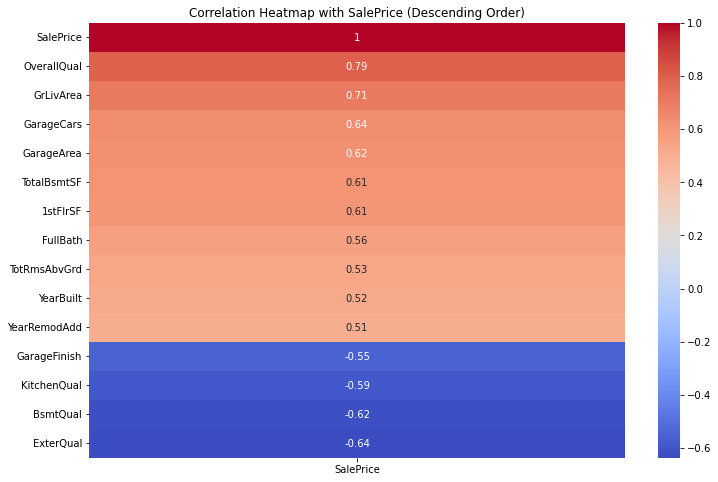

In [18]:

# Select numerical attributes
numerical_attributes = HPP_data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_attributes.corr()

sale_price_correlations = correlation_matrix['SalePrice']

#only bringing values which strongly correlate
sale_price_correlations = sale_price_correlations[abs(sale_price_correlations) > 0.5]

sale_price_correlations = sale_price_correlations.sort_values(ascending=False)


# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sale_price_correlations.to_frame(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with SalePrice (Descending Order)')
plt.show()


